<div class="alert alert-info" style="color:black" > <h1> Activity 4: Creating a test harness for comparing ML algorithms on a dataset</h1>
<p> Now you have done some manual experimenting with different hyper-parameter values for algorithms, it's time to think about automating that process.</p>
<p>Complete the cell below to create a method that: </p>
<ul>
    <li> Takes a train and test data  arrays as  parameters <br>
        HINT: develop your code using train_x, test_x,train_y,test_y for the iris data from above</li>
    <li> Runs your SimpleKNNClassifier with K={1,3,5,7,9} and stores the test accuracy for each <br>
    HINT: you could use:
        <ul>
            <li>a for loop to run the algorithm with different settings k  for  the number of neighbours(K),</li>
            <li> an <a href=https://www.geeksforgeeks.org/formatted-string-literals-f-strings-python/>f-string</a> e.g. <code>experiment_name= f'KNN_K={k}'</code> to create a meaningful name for each run </li>
            <li>a   dictionary to store your results, where each experiment has the string <em>experiment_name</em> as the key and the accuracy as the value </li>
            </ul>for this?</li>
    <li> Runs a DecisionTreeClassifier with all the different combinations of hyper-parameters from activity 3<br>
       HINT: You could do this in the same way as I've suggested above but with nested for-loops (one for each hyper-parameter) and a more complex python f-string to create the name (key), then store the results in the same dictionary.  </li>
    <li> Reports the results and which algorithm-hyperparameter combination has the highest test accuracy</li>
</ul>
</div>

<div class="alert alert-warning" style="color:black"">
    <h3> Reminder: Storing data in python dictionaries and iterating through their contents</h3>
    <p> Python dictionaries are a way of storing data that can be accessed via a key<br>
for example: <code> my_dict= {'name':'jim','familyname':"Smith", 'job':'professor'}</code><br>
<b>Keys are usually strings</b>, but the values associated with a key can be any type, including numbers.</p>

<p> The following snippets of code might be useful to you - <b>after</b> you have edited them.</p>
<p> Make a new code cell in the notebook, copy the snippets in and run it, then edit it as you need.</p>
<p><pre style='background:lightbrown;colour:black'>    
labels = ['a','b','a','c','a','d','b']
indexes = [1,4,6]
mydict={}
<span style="color:green">for</span> idx <span style="color:green">in</span> indexes:
    <span style="color:green">if</span> labels[idx] <span style="color:green">in</span> mydict.keys():
        mydict[labels[idx]] += 1
    <span style="color:green">else</span>: #create a new dictionary entry if needed
        mydict[labels[idx]] = 1
<span style="color:green">print</span>(f'mydict is {mydict}')

leastvotes=99
<span style="color:green">for</span> key,val <span style="color:green">in</span> mydict.items():
    <span style="color:green">if</span> val < leastvotes:
        unpopular= key
        leastvotes=val
<span style="color:green">print</span>(f'{unpopular}, {leastvotes}')
    </pre></p>
    </div>

In [1]:
import numpy as np

#some names
people= ['jim', 'nathan']
RUNS= 5
#some randomly created scores
scores= [[46,23,69,12,78], [79, 13,48,63,39]]

#some example of making keys and putting things into  dict
mydict={}
#populate mydict with items created using the data above
for iteration in range(RUNS):
    for person_idx in range(2):
        name= f'{people[person_idx]}_{iteration}'
        mydict[name]= scores[person_idx][iteration]

#some examples of accessing a dictionary's contents
for key,val in mydict.items():
    print( f'{key} : {val}')

# print all scores
vals= mydict.values()
print(f' mydict.values() returns {vals} of type {type(vals)}')

# Have to cast vals into a list, then make a numpy array from that, to do maths
num_vals= np.array(list(vals))
print(f' biggest value is {np.max(num_vals)}') 

#print all keys
print(mydict.keys())


jim_0 : 46
nathan_0 : 79
jim_1 : 23
nathan_1 : 13
jim_2 : 69
nathan_2 : 48
jim_3 : 12
nathan_3 : 63
jim_4 : 78
nathan_4 : 39
 mydict.values() returns dict_values([46, 79, 23, 13, 69, 48, 12, 63, 78, 39]) of type <class 'dict_values'>
 biggest value is 79
dict_keys(['jim_0', 'nathan_0', 'jim_1', 'nathan_1', 'jim_2', 'nathan_2', 'jim_3', 'nathan_3', 'jim_4', 'nathan_4'])


## Loading the Iris dataset

Iris has 150 samples and 4 features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Iris has 3 classes: ['setosa' 'versicolor' 'virginica']


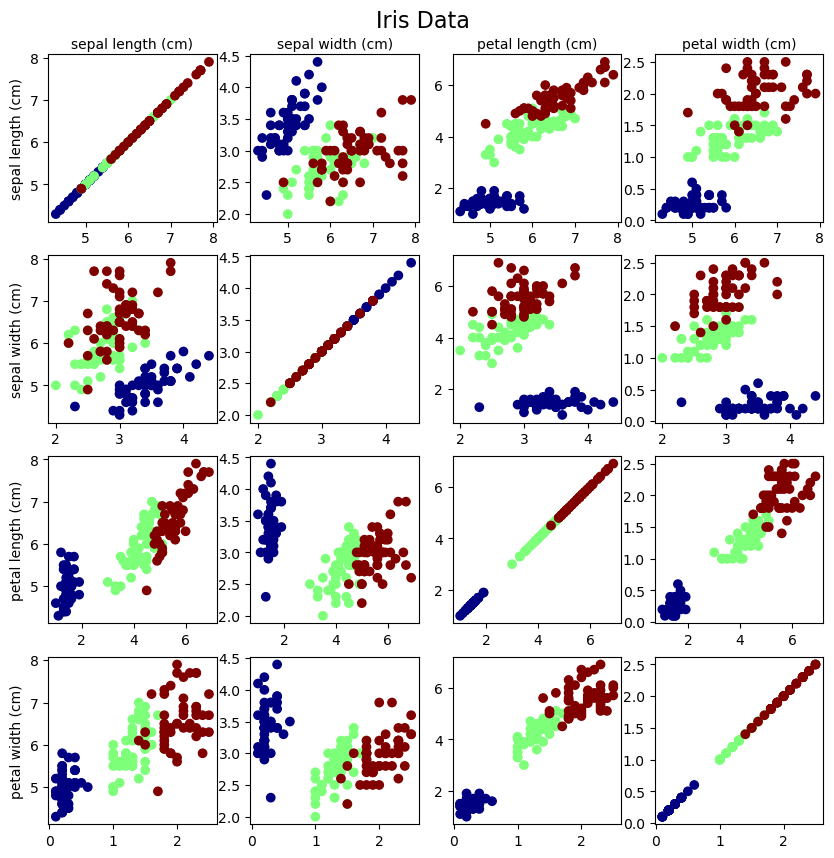

In [2]:
import week6_utils as w6utils
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

# Load the Iris data
iris_data = load_iris(return_X_y=False)
# Extract the data and labels, feature names, and label names
irisX = iris_data.data
irisy = iris_data.target
feature_names = iris_data.feature_names
label_names = iris_data.target_names

print(f"Iris has {irisX.shape[0]} samples and {irisX.shape[1]} features: {feature_names}")
print(f"Iris has 3 classes: {label_names}")

# Create a scatter plot of all the Iris data
w6utils.show_scatterplot_matrix(irisX, irisy, feature_names, "Iris Data")

In [3]:
# Make train/test split of datasets
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(irisX, irisy, test_size=0.33, stratify=irisy)

In [4]:
from sklearn.base import ClassifierMixin

class Simple1NNClassifier(ClassifierMixin):
    """ Simple example class for 1-Nearest Neighbours algorithm.
    Assumes numpy is imported as np and uses Euclidean distance
    """    
    def dist_a_b(self, a:np.array, b:np.array)->float:
        """ Euclidean distance between same-size vectors a and b"""
        assert a.shape==b.shape, 'vectors not same size calculating distance'
        return np.linalg.norm(a-b) 
    
    def fit(self, x:np.ndarray, y:np.array):
        """ just stores the data for k-nearest neighbour"""
        self.model_x = x
        self.model_y = y
        self.is_fitted_=True
        self.classes_=np.unique(y)
        
    def predict(self, new_items:np.ndarray):
        """ makes predictions for an array of new items"""

        # Get the number of new  and  stored items from their shapes
        num_new = new_items.shape[0]
        num_stored = self.model_x.shape[0]
        
        # Create empty array to store predictions
        y_pred = np.zeros(num_new, dtype=int)
        
        # Create array of distances: one row(column) for each new(stored) item
        distances = np.zeros((num_new, num_stored))
        for row, new_item in enumerate(new_items):
            for col, stored_example in enumerate(self.model_x):
                distances[row][col]= self.dist_a_b(new_item, stored_example)

        # Make predictions  for each new example in turn
        for item_idx in range(num_new):
            y_pred[item_idx] = self.predict_one(item_idx, distances)
        
        # Return the predictions
        return y_pred
    
    def predict_one(self, item_idx:int, distances:np.ndarray):
        """ makes a class prediction for a single new item
        This version is just for 1 Nearest Neighbour

        Parameters
        ----------
        item_idx: int
            index of item to make prediction for - i.e. idx of row in distances matrix

        distances: numpy ndarray
            array of distances between new items (rows) and training set records (columns)
        """
        # We're going to use numpy's argmin() method - we saw this in week 1
        # - We give it the row corresponding to the item to predict
        # - It returns the index of column with lowest value in that row
        idx_of_nearest_neighbour = np.argmin(distances[item_idx])

        # Return the predicted class of the nearest neighbour
        return self.model_y[ idx_of_nearest_neighbour]

In [5]:
class SimpleKNNClassifier(Simple1NNClassifier):
    """Complete this class to produce a KNN classifier"""
    
    def __init__(self, K=1):
        """ Constructor for the KNN classifier
        you will need to change the function signature to expect and store a parameter K
        """
        self.K = K
        super().__init__() #initialise parent class

        # raise NotImplementedError("Complete the function")

    def predict_one(self, item_idx:int, distances:np.ndarray):
        """ makes a class prediction for a single new item
        This version is for K Nearest Neighbour

        Parameters
        ----------
        item_idx: int
            index of item to make prediction for - i.e. idx of row in distances matrix

        distances: numpy ndarray
            array of distances between new items (rows) and training set records (columns)
        """
        # ====> insert your code below here

        # Get indices of K nearest neighbors
        k_indices = np.argsort(distances[item_idx])[:self.K]

        # Get labels of K nearest neighbors
        k_labels = self.model_y[k_indices]

        # Return the most common label
        return np.bincount(k_labels).argmax()

        #you will need to delete the following line for your code to run
        # raise NotImplementedError("Complete the function")
        
        # <==== insert your code above here



In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import ClassifierMixin

In [7]:
def first_ml_test_harness(train_x:np.ndarray,train_y:np.ndarray,
                          test_x:np.ndarray,test_y:np.ndarray):
    """ code to compare supervised machine learning algorithms on a dataset"""
    # insert your code below here
    
    # Dictionary to store results
    results = {}
    
    # Test SimpleKNNClassifier with K = {1, 3, 5, 7, 9}
    for k in [1, 3, 5, 7, 9]:
        experiment_name = f'KNN_K={k}'
        knn = SimpleKNNClassifier(K=k)
        knn.fit(train_x, train_y)
        predictions = knn.predict(test_x)
        accuracy = 100 * (test_y == predictions).sum() / test_y.shape[0]
        results[experiment_name] = accuracy
    
    # Test DecisionTreeClassifier with max_depth = {None, 1, 3, 5} and min_samples_leaf = {1, 3, 5}
    for depth in [None, 1, 3, 5]:
        for min_leaf in [1, 3, 5]:
            experiment_name = f'DT_depth={depth}_minleaf={min_leaf}'
            dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=min_leaf)
            dt.fit(train_x, train_y)
            predictions = dt.predict(test_x)
            accuracy = 100 * (test_y == predictions).sum() / test_y.shape[0]
            results[experiment_name] = accuracy
    
    # Report results
    print("\nTest Harness Results:")
    for key, val in results.items():
        print(f"{key}: Test Accuracy = {val:.2f}%")
    
    # Find the best performer
    best_experiment = max(results, key=results.get)
    best_accuracy = results[best_experiment]
    print(f"\nBest Performer: {best_experiment} with Test Accuracy = {best_accuracy:.2f}%")
    
    return results
    
    # raise NotImplementedError("Student exercise: implement code to compare machine learning algorithms")
    #insert your code above here

In [16]:
#now run your code for the iris data
first_ml_test_harness(train_x, train_y, test_x, test_y)


Test Harness Results:
KNN_K=1: Test Accuracy = 96.00%
KNN_K=3: Test Accuracy = 96.00%
KNN_K=5: Test Accuracy = 98.00%
KNN_K=7: Test Accuracy = 96.00%
KNN_K=9: Test Accuracy = 98.00%
DT_depth=None_minleaf=1: Test Accuracy = 96.00%
DT_depth=None_minleaf=3: Test Accuracy = 96.00%
DT_depth=None_minleaf=5: Test Accuracy = 96.00%
DT_depth=1_minleaf=1: Test Accuracy = 66.00%
DT_depth=1_minleaf=3: Test Accuracy = 66.00%
DT_depth=1_minleaf=5: Test Accuracy = 66.00%
DT_depth=3_minleaf=1: Test Accuracy = 96.00%
DT_depth=3_minleaf=3: Test Accuracy = 96.00%
DT_depth=3_minleaf=5: Test Accuracy = 96.00%
DT_depth=5_minleaf=1: Test Accuracy = 96.00%
DT_depth=5_minleaf=3: Test Accuracy = 96.00%
DT_depth=5_minleaf=5: Test Accuracy = 96.00%

Best Performer: KNN_K=5 with Test Accuracy = 98.00%


{'KNN_K=1': 96.0,
 'KNN_K=3': 96.0,
 'KNN_K=5': 98.0,
 'KNN_K=7': 96.0,
 'KNN_K=9': 98.0,
 'DT_depth=None_minleaf=1': 96.0,
 'DT_depth=None_minleaf=3': 96.0,
 'DT_depth=None_minleaf=5': 96.0,
 'DT_depth=1_minleaf=1': 66.0,
 'DT_depth=1_minleaf=3': 66.0,
 'DT_depth=1_minleaf=5': 66.0,
 'DT_depth=3_minleaf=1': 96.0,
 'DT_depth=3_minleaf=3': 96.0,
 'DT_depth=3_minleaf=5': 96.0,
 'DT_depth=5_minleaf=1': 96.0,
 'DT_depth=5_minleaf=3': 96.0,
 'DT_depth=5_minleaf=5': 96.0}